# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import accuracy_score
# Ignoring Unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset into a pandas dataframe.

In [2]:
data_set = pd.read_csv('winequality-red.csv')
data_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Check the unique values of the target variable and the shape of the dataset.

In [3]:
data_set["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
data_set.shape

(1599, 12)

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Check the information and the missing values of the dataset, and create a heatmap to visualize the missing values.

In [6]:
data_set.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data_set.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

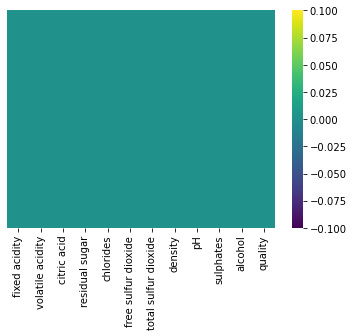

In [8]:
sns.heatmap(data_set.isnull(), yticklabels=False, cmap='viridis')

In [9]:
# Function to create a histogram, and a boxplot and scatter plot.
def diagnostic_plots(data_set, variable,target):
# Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(data_set[variable], bins=30,color = 'r')
    plt.title('Histogram')

    # scatter plot
    plt.subplot(1, 4, 2)
    plt.scatter(data_set[variable],data_set[target],color = 'g')
    plt.title('Scatterplot')
    
    # box plot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=data_set[variable],color = 'b')
    plt.title('Boxplot')
    
    # barp lot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = data_set)   
    plt.title('Barplot')
    
    plt.show()

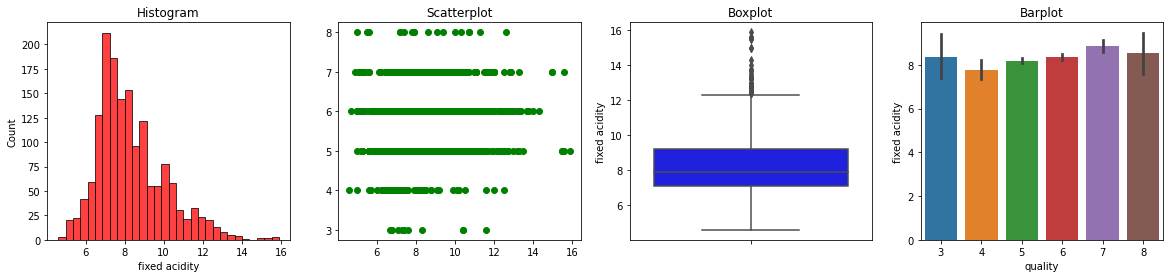

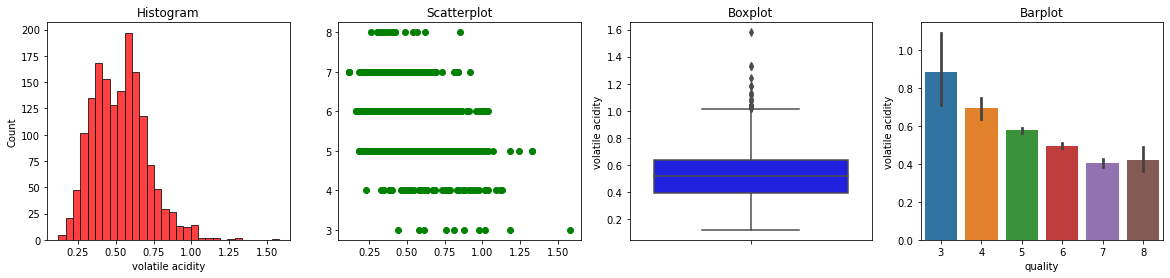

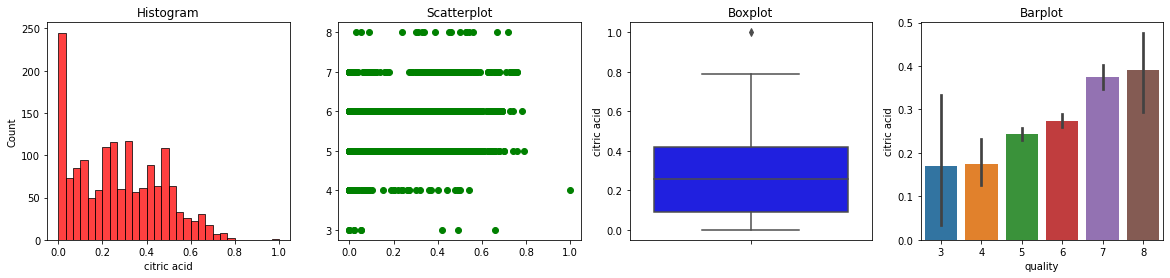

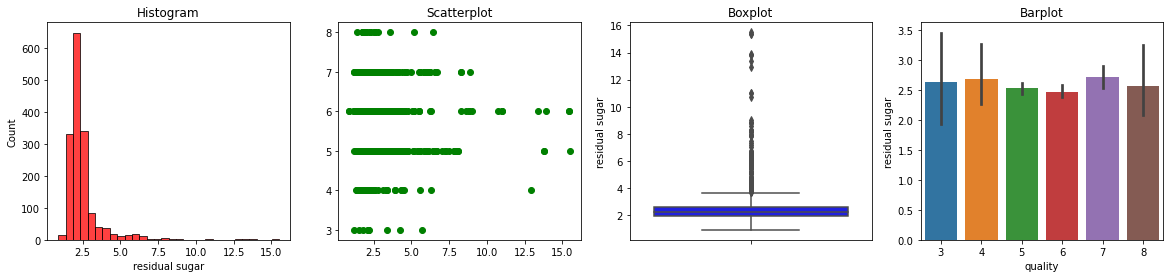

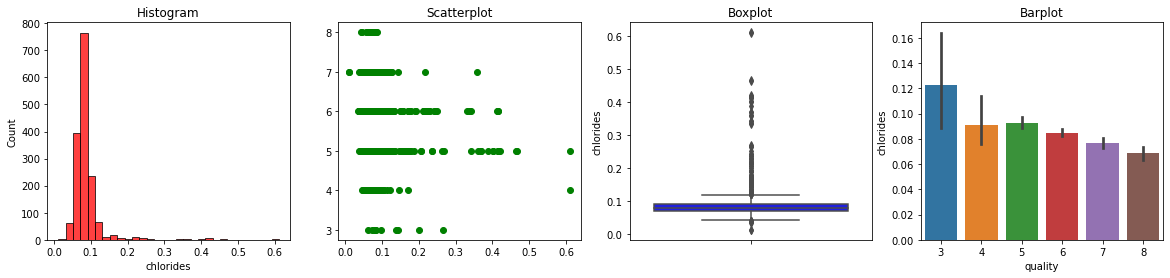

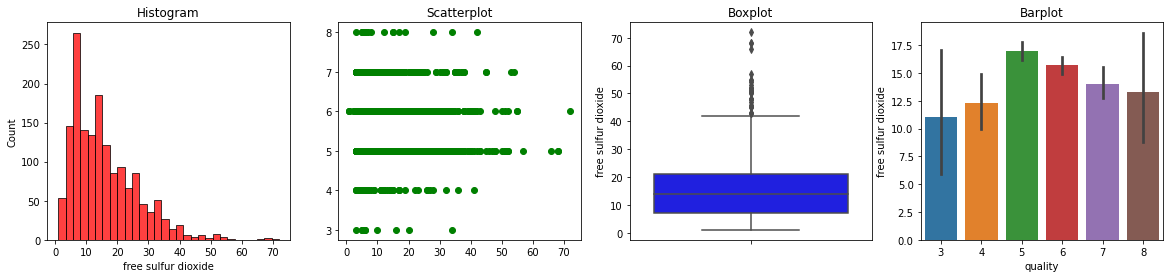

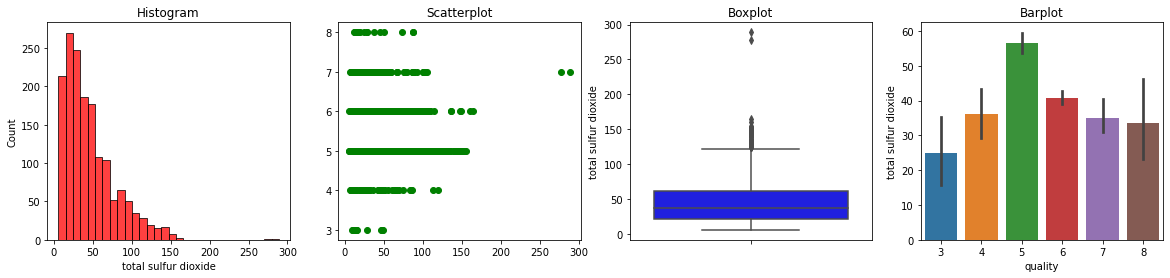

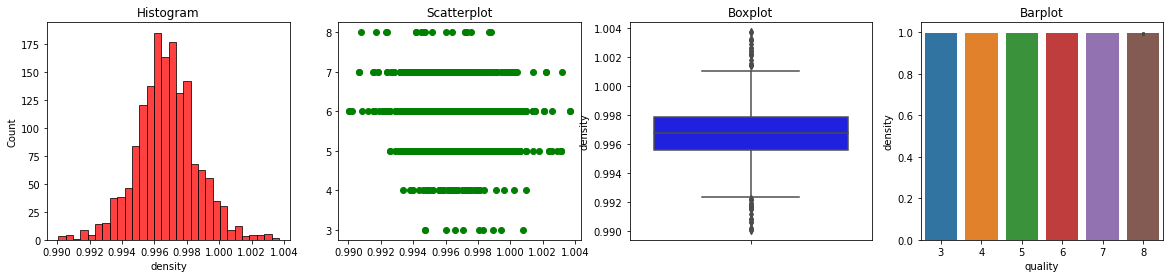

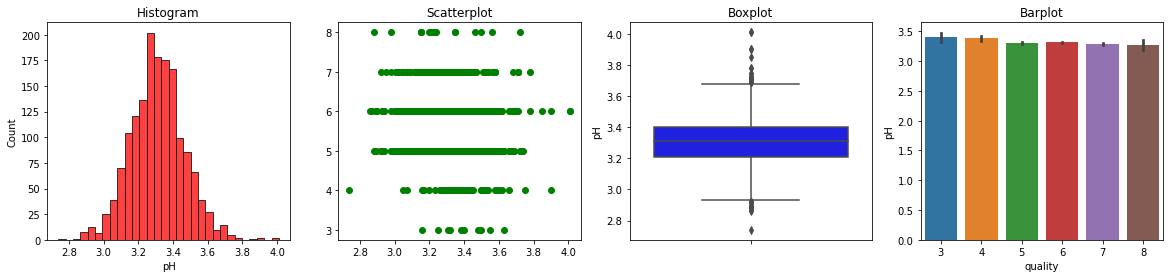

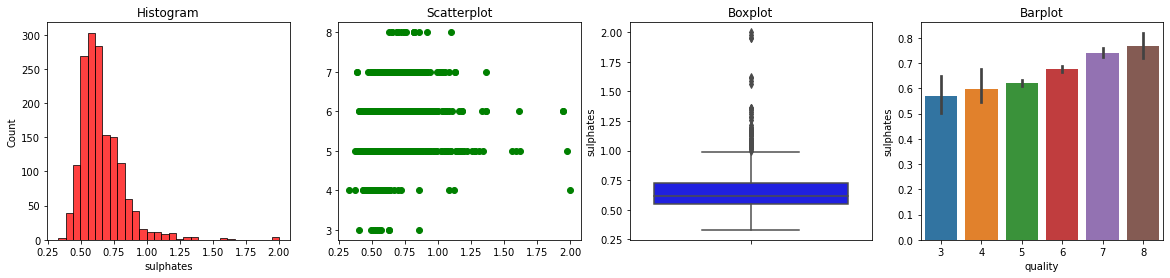

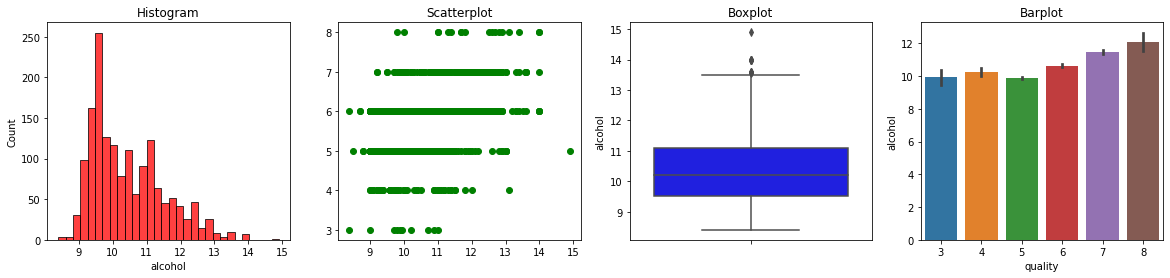

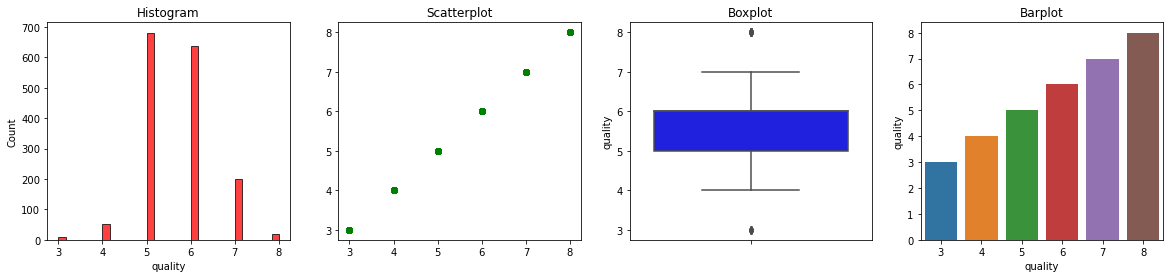

In [10]:
for variable in data_set:
    diagnostic_plots(data_set,variable,'quality')

# Visualize the correlation matrix 

<AxesSubplot:>

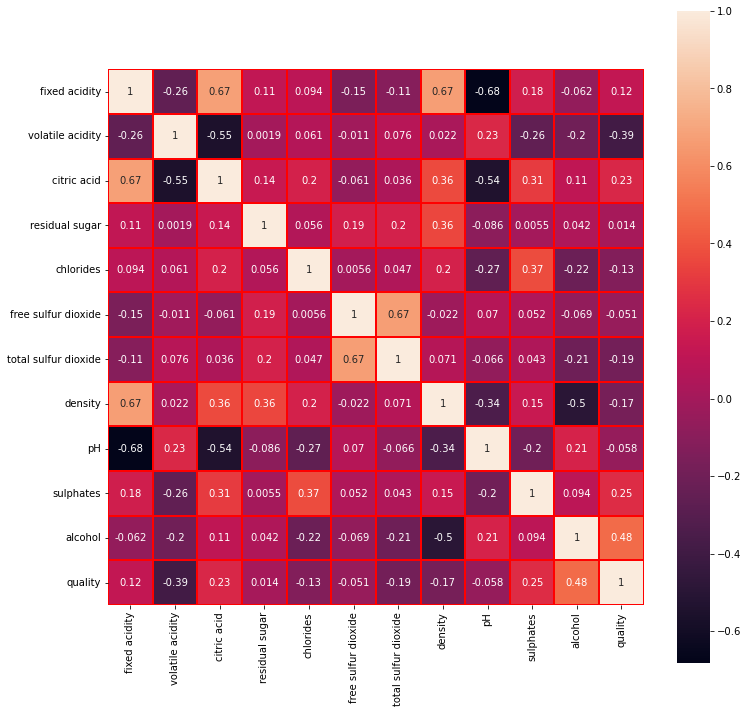

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(data_set.corr(), linewidths=0.2, vmax=1.0, square=True, linecolor='red', annot=True)

In [12]:
data_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:xlabel='alcohol', ylabel='Count'>

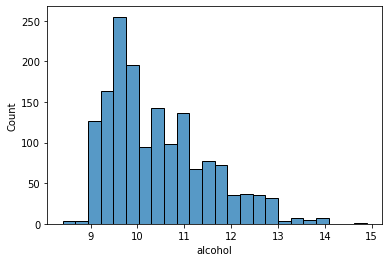

In [13]:
sns.histplot(data=data_set["alcohol"])

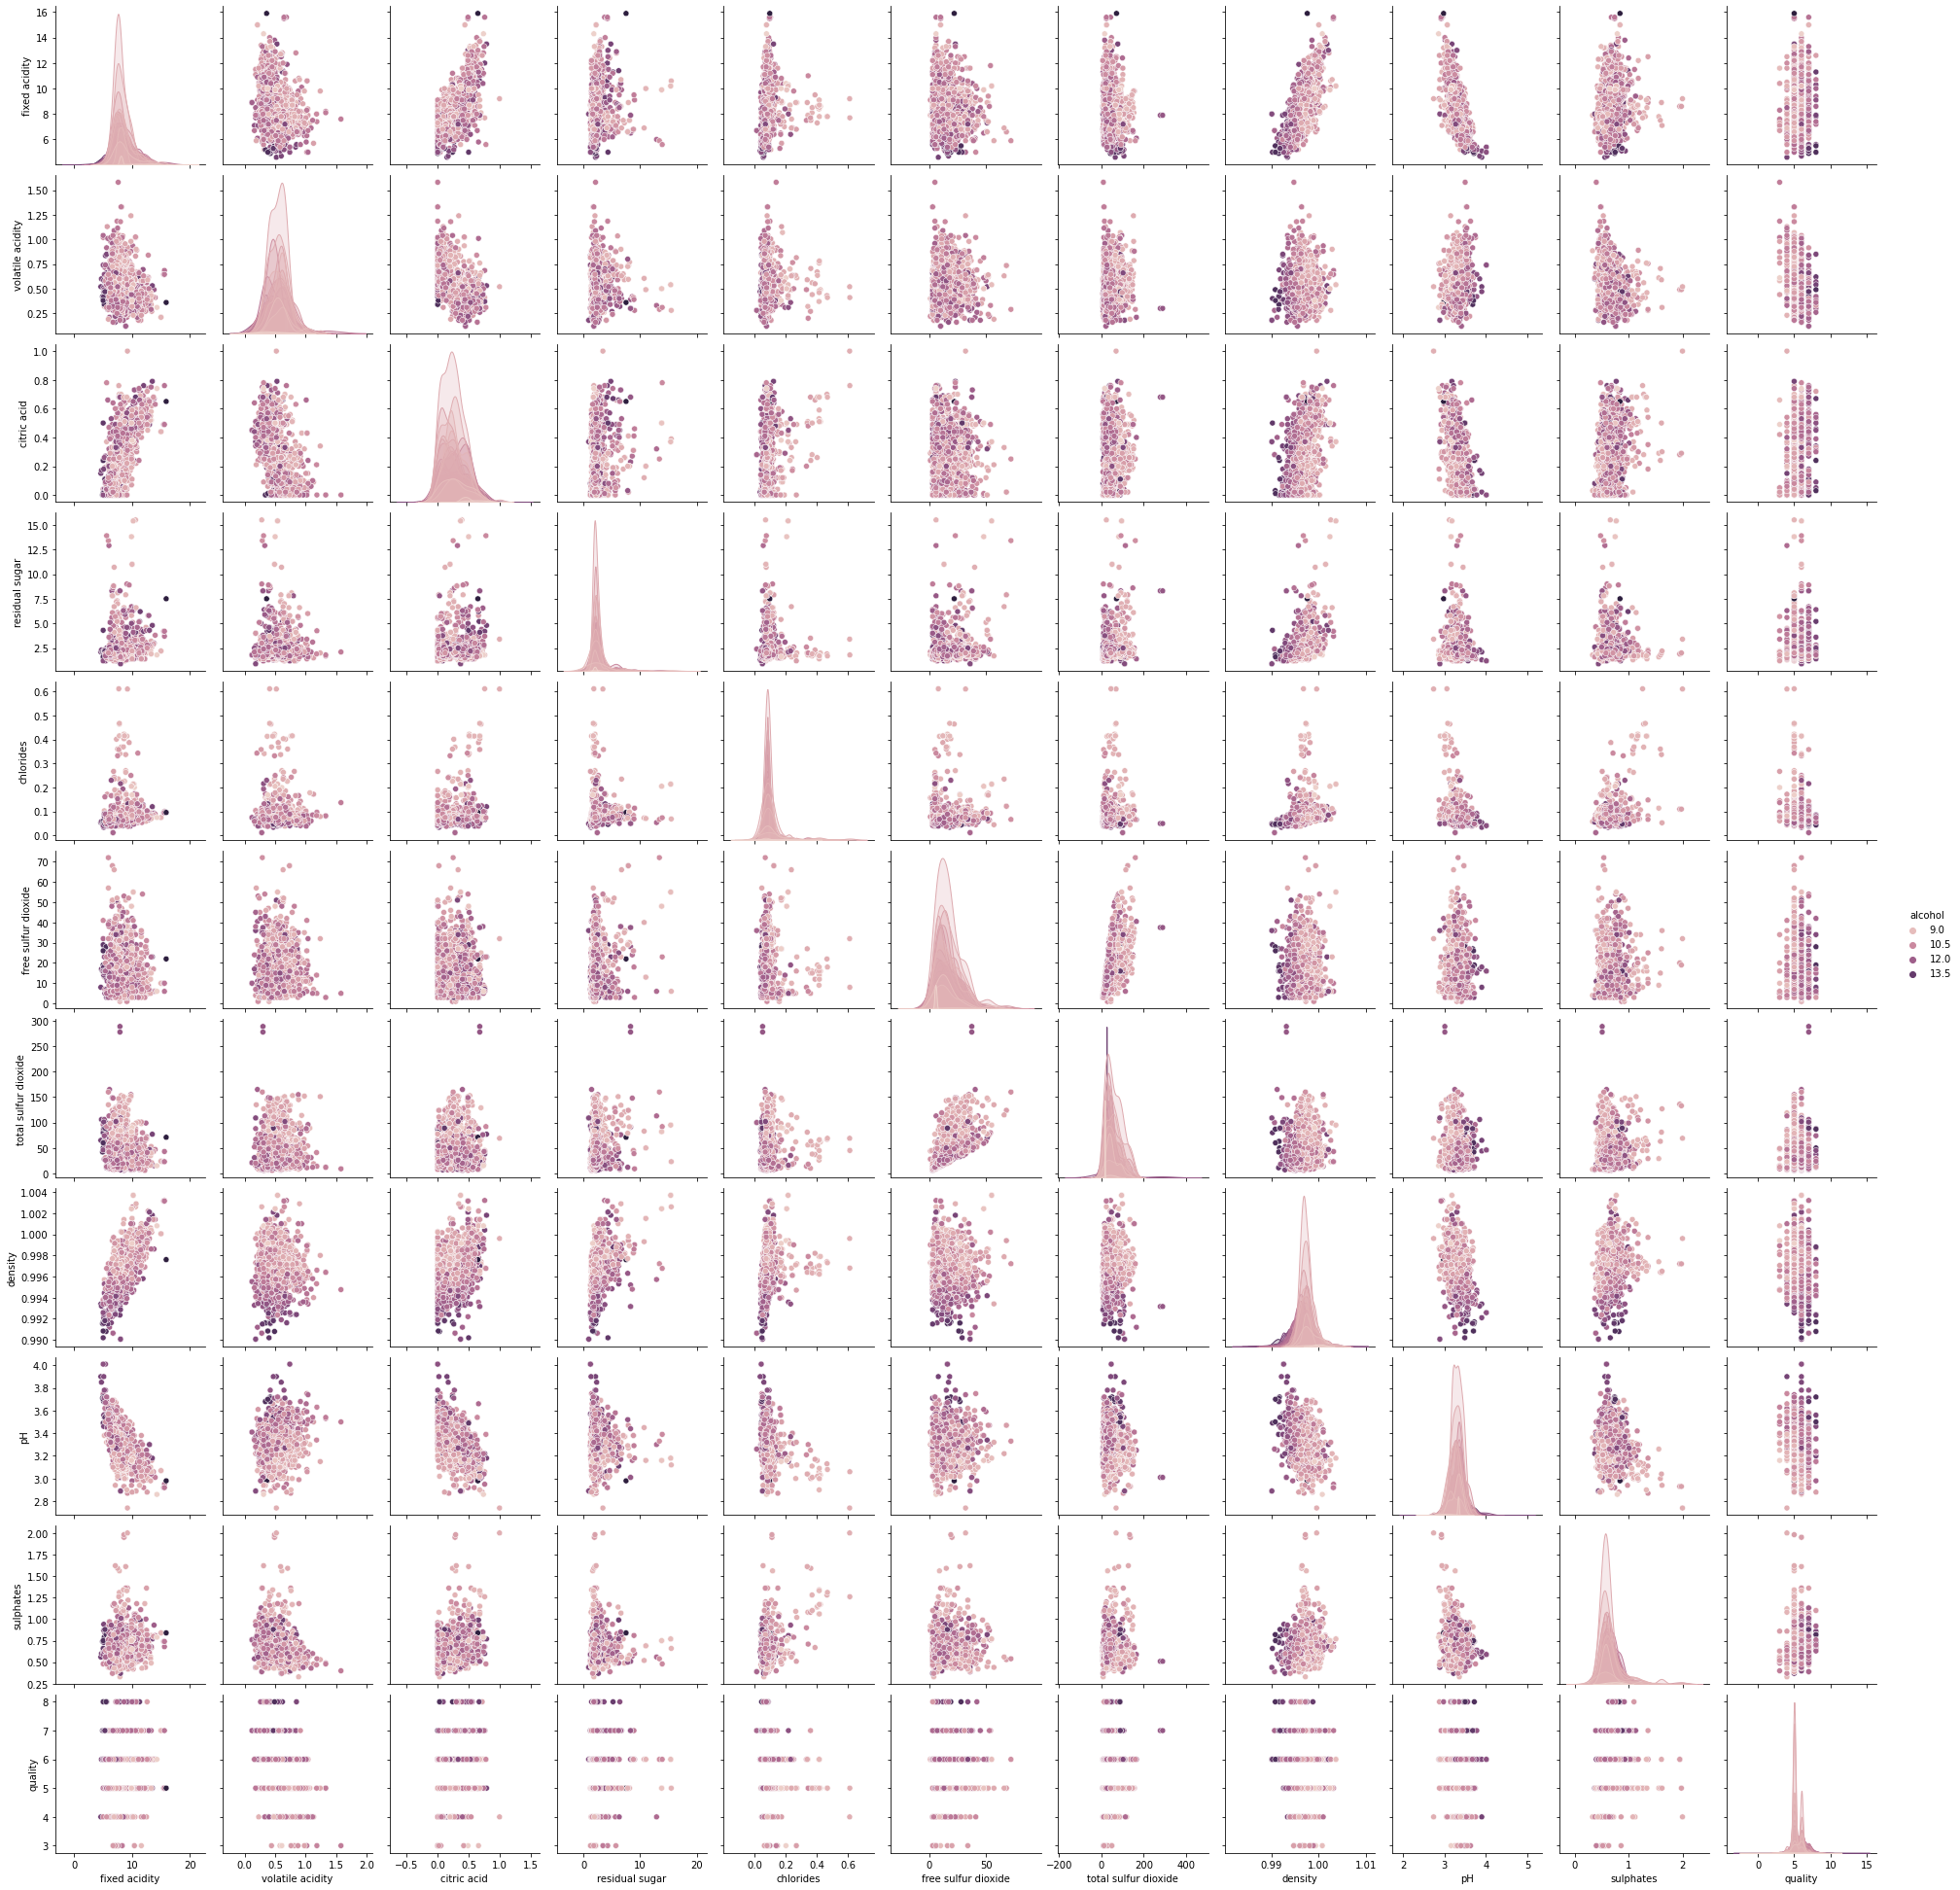

In [14]:
sns.pairplot(data=data_set,hue="alcohol")

<AxesSubplot:xlabel='density', ylabel='Count'>

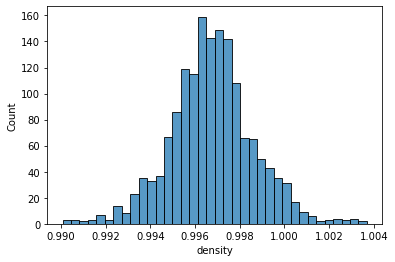

In [15]:
sns.histplot(data=data_set["density"])

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

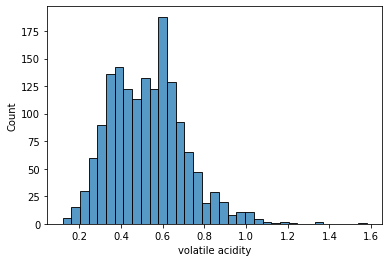

In [16]:
sns.histplot(data=data_set["volatile acidity"])

0.19368349811284427


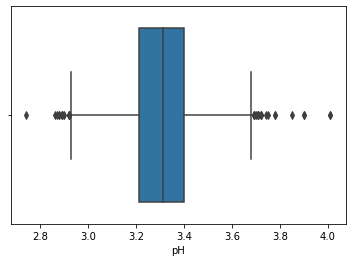

In [17]:
sns.boxplot(data_set["pH"])
print(data_set['pH'].skew())

# Quality Classification
#### Dataset tips of Red Wine Quality;
#### bad quality < 6.5
#### good quality > 6.5

In [18]:
quality=[]
for x in data_set["quality"]:
    if x> 6.5:
        quality.append("Good")
    else:
        quality.append("Bad")
data_set["quality"]=quality 

In [19]:
data_set.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

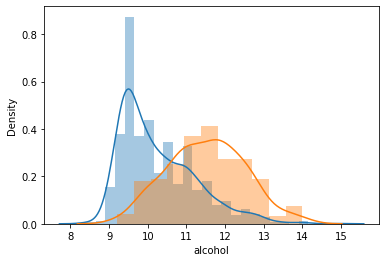

In [20]:
sns.distplot(data_set[data_set["quality"]=="Bad"]["alcohol"])
sns.distplot(data_set[data_set["quality"]=="Good"]["alcohol"])

# Encode the categorical target variable using LabelEncoder.

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_set["quality"]=le.fit_transform(data_set["quality"])

In [22]:
x=data_set.iloc[:,:-1].values 
y=data_set.iloc[:,-1].values 

In [23]:
data_set["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [24]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_std,y_std=ros.fit_resample(x,y)

In [25]:
from collections import Counter
Counter(y_std)

Counter({0: 1382, 1: 1382})

# Split the dataset into train and test sets

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_std,y_std,random_state=11,test_size=.2)

# Standardize the features using StandardScaler.

In [27]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_data_train=std.fit_transform(x_train)
x_data_test=std.fit_transform(x_test)

# Train a RandomForestClassifier model on the train set

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_data_train,y_train)

y_pred_rfc=rfc.predict(x_data_test)

ac_rfc=accuracy_score(y_pred_rfc,y_test)*100
ac_rfc

97.10669077757686